In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df = pd.read_csv('Telco-Customer-Churn.csv')


In [39]:
df.dropna(inplace=True)

In [40]:
print(df.head())
print(df.describe())
print(df.dtypes)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [41]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


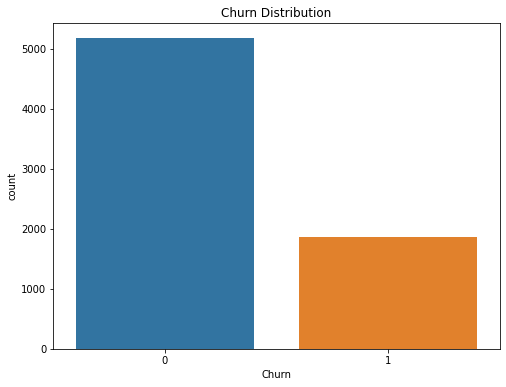

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


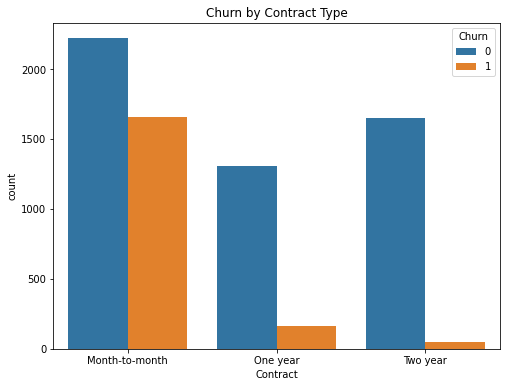

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


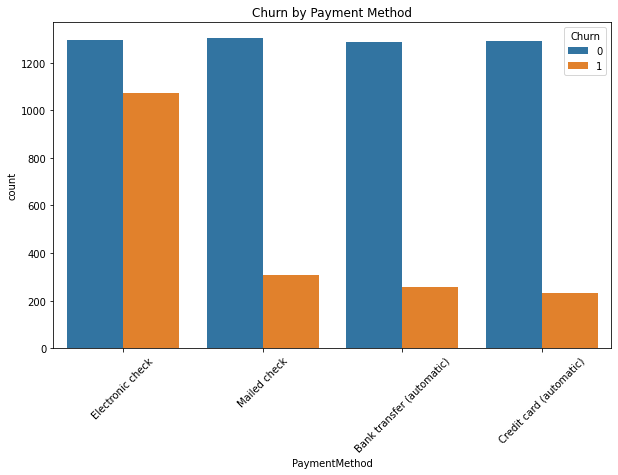

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


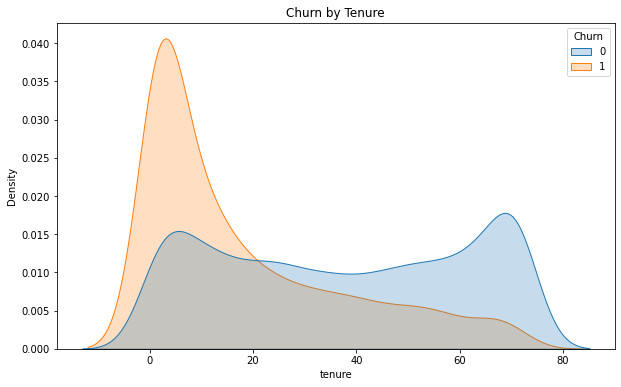

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='tenure', hue='Churn', data=df, fill=True, common_norm=False)
plt.title('Churn by Tenure')
plt.show()


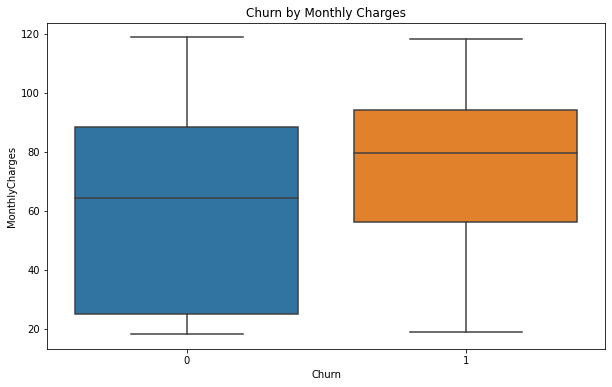

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn by Monthly Charges')
plt.show()

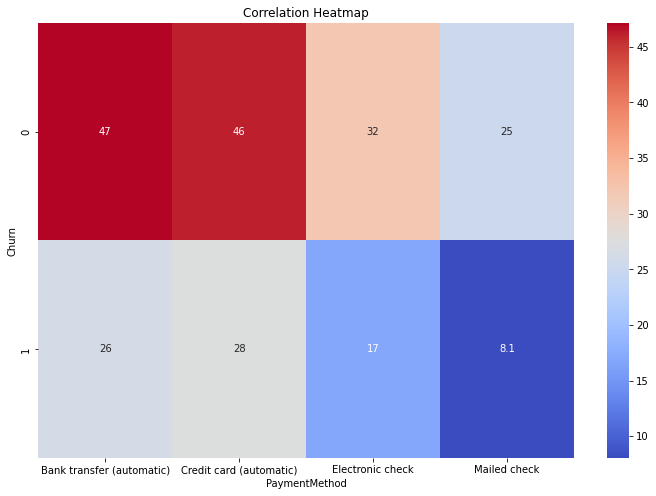

In [47]:
# Filter out combinations with insufficient data
df_filtered = df.groupby(['Churn', 'PaymentMethod']).filter(lambda x: len(x) > 10)

# Pivot the data
pivot_df = df_filtered.pivot_table(index='Churn', columns='PaymentMethod', values='tenure')

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
